# chapter 04  
# 시각화

- 데이터 종류  
  1. 수치형 : 연속(키,몸무게,수입),이산(과일 개수,페이지 수)  
  2. 범주형 : 순서(학점,순위),명목(성별,음식 종류,우편 번호)  
- 수치형 시각화  
  1. 히스토그램  
  2. 커널밀도  
  3. 분포도  
  4. 러그플롯  
- 범주형 시각화  
  1. 막대 그래프  
  2. 포인트 플롯  
  3. 박스 플롯  
  4. 바이올릿 플롯  
  5. 카운트 플롯  
  6. 파이 그래프  
- 데이터 관계 시각화  
  1. 히트맵  
  2. 라인플롯  
  3. 산점도  
  4. 산점도 + 회귀선

In [1]:
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 수치형 데이터

## histogram

수치형 데이터의 구간별 빈도수를 나타내는 그래프

<AxesSubplot:xlabel='age', ylabel='Count'>

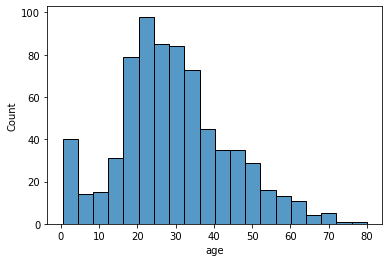

In [4]:
sns.histplot(data=titanic,x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

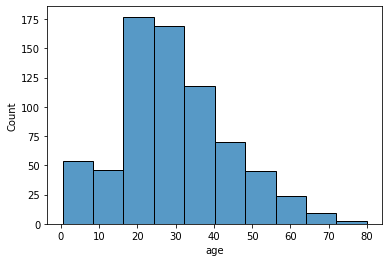

In [5]:
sns.histplot(data=titanic,x='age',bins=10) #구간을 10개로 고정

<AxesSubplot:xlabel='age', ylabel='Count'>

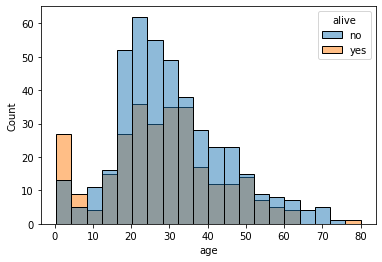

In [6]:
sns.histplot(data=titanic,x='age',hue='alive')

기본적으로 수치형 데이터 하나에 대한 빈도를 나타내는데 범주별로 구분해보고 싶을 때 hue사용

<AxesSubplot:xlabel='age', ylabel='Count'>

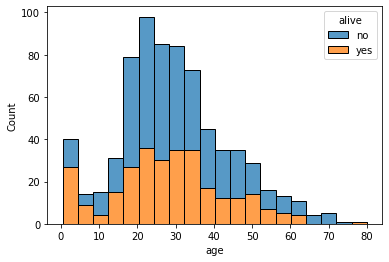

In [7]:
sns.histplot(data=titanic,x='age',hue='alive',multiple='stack') # 누적

## kernel density estimation

<AxesSubplot:xlabel='age', ylabel='Density'>

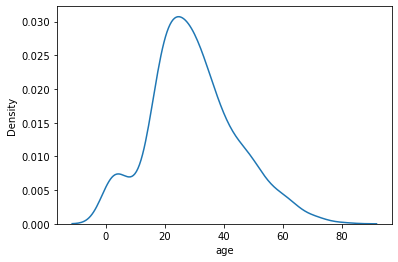

In [8]:
sns.kdeplot(data=titanic,x='age')

<AxesSubplot:xlabel='age', ylabel='Density'>

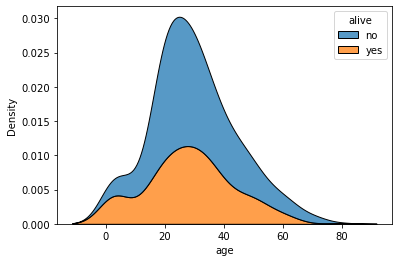

In [9]:
sns.kdeplot(data=titanic,x='age',hue='alive',multiple='stack') 

 ## 분포도 

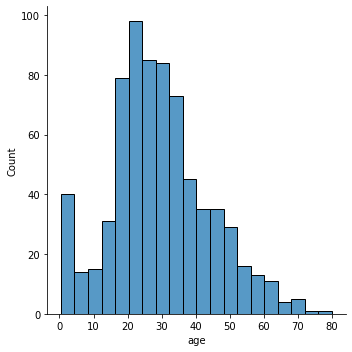

In [10]:
sns.displot(data=titanic,x='age')

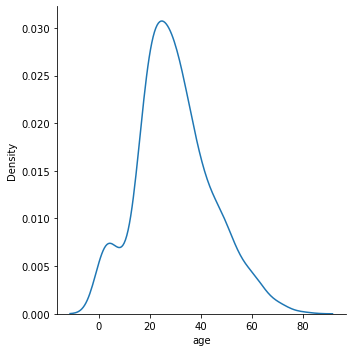

In [11]:
sns.displot(data=titanic,x='age',kind='kde')

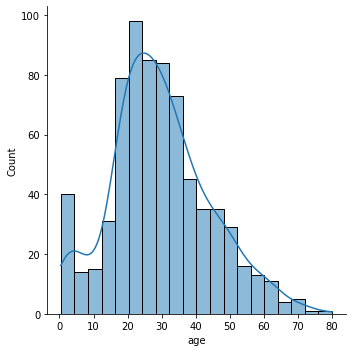

In [12]:
sns.displot(data=titanic,x='age',kde=True)

## 러그플롯 

marginal distribution(주변 분포)을 나타내는 그래프  
단독으로 사용보다는 다른 분포도 그래프와 같이 사용

<AxesSubplot:xlabel='age', ylabel='Density'>

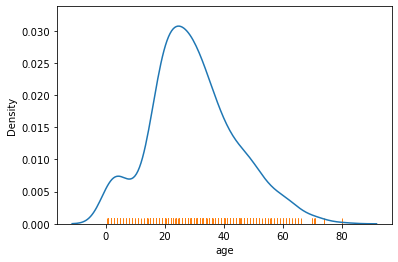

In [13]:
sns.kdeplot(data=titanic,x='age')
sns.rugplot(data=titanic,x='age')

age가 어떻게 분포되어 있는지를 x축 위에 작은 선분(러그)으로 표시

# 범주형 데이터

##  막대 그래프

<AxesSubplot:xlabel='class', ylabel='fare'>

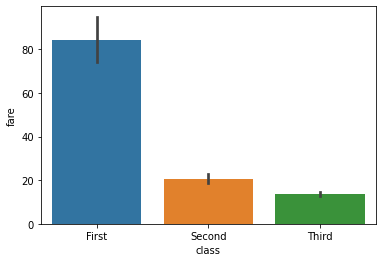

In [14]:
sns.barplot(x='class',y='fare',data=titanic)

범주형 데이터에 따라 수치형이 어떻게 달라지는지 파악할 때 사용  
수치형 데이터의 평균(높이)과 신뢰구간(검은막대)을 보여줌    
평균 말고도 가능: 중앙값,평균값,최솟값

등급이 높을수록 평균 운임이 비싸지고 신뢰구간이 넓어짐

## 포인트 플롯 

<AxesSubplot:xlabel='class', ylabel='fare'>

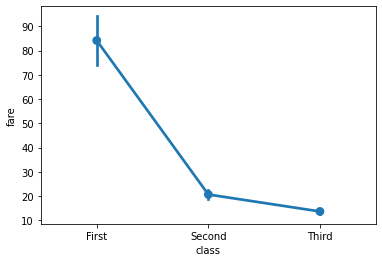

In [15]:
sns.pointplot(x='class',y='fare',data=titanic)

한 화면에 여러 그래프를 그릴 때 포인트 플랏을 쓰는게 좋음

## 박스플롯

5가지 요약 수치를 사용(min,Q1,Q2,Q3,max)

<AxesSubplot:xlabel='class', ylabel='age'>

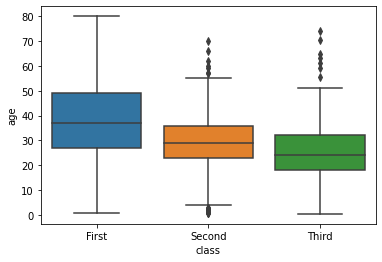

In [16]:
sns.boxplot(x='class',y='age',data=titanic)

## 바이올린 플롯

<AxesSubplot:xlabel='class', ylabel='age'>

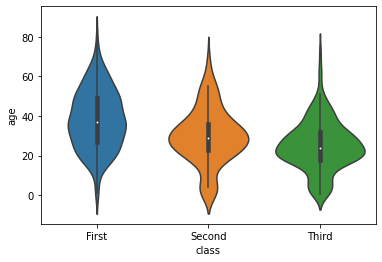

In [17]:
sns.violinplot(x='class',y='age',data=titanic)

5가지 요약 수치를 한눈에 보고 싶으면 박스플롯  
전체적인 분포 양상을 알고 싶으면 바이올린플롯

<AxesSubplot:xlabel='class', ylabel='age'>

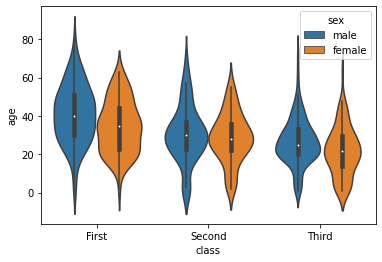

In [18]:
sns.violinplot(x='class',y='age',hue='sex',data=titanic)

## 카운트 플롯

<AxesSubplot:xlabel='count', ylabel='class'>

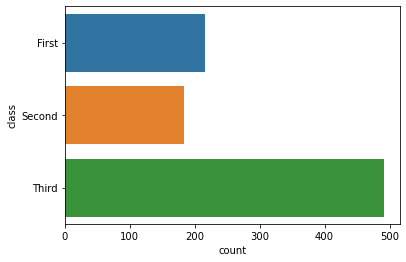

In [19]:
sns.countplot(y='class',data=titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

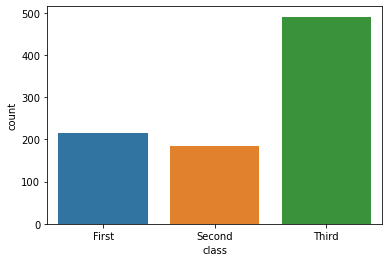

In [20]:
sns.countplot(x='class',data=titanic)

##  파이 그래프

In [21]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x14c31555520>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

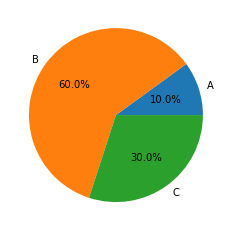

In [22]:
x=[10,60,30]
labels=['A','B','C']
plt.pie(x=x,labels=labels,autopct='%.1f%%')

# 데이터 관계 시각화

## 히트맵

데이터 간 관계를 색상으로 표현

In [23]:
flights=sns.load_dataset('flights')

In [24]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


pivot 함수를 사용하여 구조를 바꿔야 함

In [25]:
import pandas as pd

연도의 월별 승객 수를 알고 싶으니, month를 행으로,year를 열로,합산할 데이터를 passengers로 지정

In [26]:
flights_pivot=flights.pivot(index='month',columns='year',values='passengers')

In [27]:
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

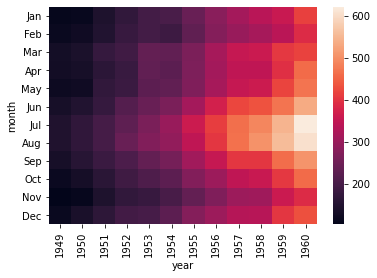

In [28]:
sns.heatmap(flights_pivot)

## 라인플롯

두 수치형 데이터 사이의 관계를 나타낼 때 사용 

<AxesSubplot:xlabel='year', ylabel='passengers'>

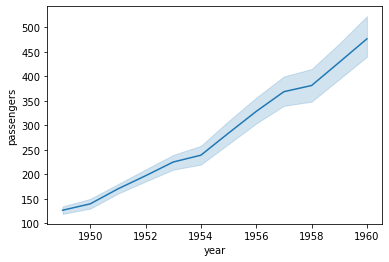

In [29]:
sns.lineplot(x='year',y='passengers',data=flights)

평균과 95%신뢰구간을 나타냄

## 산점도

두 데이터의 관계를 점으로 표현

In [32]:
tips=sns.load_dataset('tips')

In [33]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

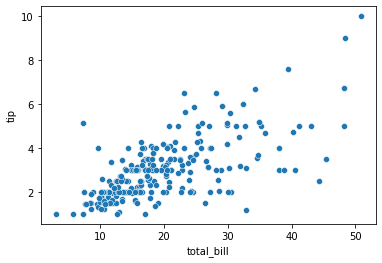

In [34]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

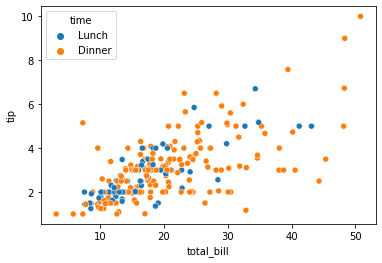

In [35]:
sns.scatterplot(x='total_bill',y='tip',hue='time',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

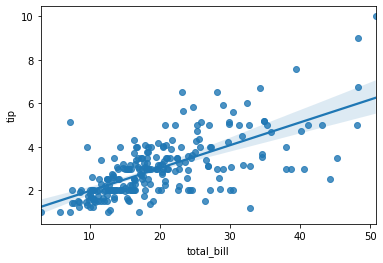

In [36]:
sns.regplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

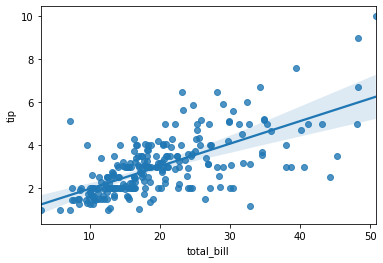

In [37]:
sns.regplot(x='total_bill',y='tip',ci=99,data=tips)